In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [2]:
nomeFruta = input("Fruta? ")

Fruta? teste


In [3]:
with open("Calibracao_hsv_" + nomeFruta + ".txt") as hsv:
    
    parametros = hsv.readlines()
          
    hMin = int(parametros[0])
    sMin = int(parametros[1])
    vMin = int(parametros[2])
        
    hMax = int(parametros[3])
    sMax = int(parametros[4])
    vMax = int(parametros[5])

arquivo com as coordenadas de segmentação do pedunculo
*
*
*
*
*
*
*



In [4]:
def segmentacaoHSV(imgCorte):
    
    baixo = np.array([hMin, sMin, vMin])
    alto =  np.array([hMax, sMax, vMax])

    img_hsv = cv2.cvtColor(imgCorte, cv2.COLOR_BGR2HSV)

    mask = cv2.inRange(img_hsv, baixo, alto)

    img_seg = cv2.bitwise_and(imgCorte, imgCorte, mask = mask)
    
    return img_seg

In [5]:
def segmentacaoBGR(imgHSV):
    
    imgBGR = np.copy(imgHSV)
    
    largura = imgHSV.shape[1]
    altura  = imgHSV.shape[0]

    imgBGR = cv2.resize(imgHSV, (largura, altura))

    height, width, canalCor = imgBGR.shape

    base =  [20,20,15]
    fraca = [42,90,80]
    forte = [70, 70, 100]
    preto = [0, 0, 0]

    for x in range(0, width):

        for y in range(0, height):

            canalXY = imgBGR[y,x]

            if all(canalXY <= base):

                imgBGR[y,x] = preto

            elif all(canalXY > fraca):

                imgBGR[y,x] = preto

    return imgBGR

In [ ]:
corProcuradaBlue  = 62
corProcuradaGreen = 88
corProcuradaRed   = 83

altura, largura, canal = img.shape

for x in range(0, largura):
    
    for y in range(0, altura):
        
        print(img[y, x])

if(b > x and b < y and g > x and g < y and r > x and r < y):

    img[a,b] = [b,g,r]

else:

    img[a,b] = 0


#o melhor ponto sera dado pela menor distância euclidiana.

In [10]:
#cap = cv2.VideoCapture(1)

while True:

    #ret, frame = cap.read()
    
    frame = cv2.imread("teste.jpg")
    hsv =  cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    imgPedunculo = np.copy(frame)

    lim_inf = np.array([hMin, sMin, vMin])
    lim_sup = np.array([hMax, sMax, vMax])
        
    color_mask = cv2.inRange(hsv, lim_inf, lim_sup)

    (couts,hir) = cv2.findContours(color_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
  
    for cout in couts:
        
        area = cv2.contourArea(cout)

        if (area > 800):

            x,y,w,h = cv2.boundingRect(cout)
            frame = cv2.rectangle(frame, (x,y),(x+w,y+h),(0,0,255),2)
            
            xt = x
            xb = x+w
            yt = y
            yb = y+h

            #Regiao de interesse

            Lmax = abs(xt - xb)
            Hmax = abs(yt - yb)

            RoiL = 0.5 * Lmax
            RoiH = 0.5 * Hmax

            #Esses coordenadas são as que vão delimitar a area onde a imagem vai ser cortada

            centro = (xb + xt) / 2

            centroCaixa = RoiL / 2

            x1 = centro - centroCaixa
            x2 = centro + centroCaixa

            y1 = abs(yt - 5)
            y2 = abs(RoiH - y1)
            
            centerPointX = (x1 + x2) / 2
            centerPointY = (y1 + y2) / 2
            
            centerPointX = int(centerPointX)
            centerPointY = int(centerPointY)
            
            x1 = int(x1)
            y1 = int(y1)
            x2 = int(x2)
            y2 = int(y2)

            TopLeftY = y2
            TopLeftX = x1
            
            corte = imgPedunculo[y2:y1, x1:x2]
            
            corteHSV = segmentacaoHSV(corte)
            
            corteBGR = segmentacaoBGR(corteHSV)
            
            
            cv2.rectangle(frame, (x2, y2), (x1,y1), (255,255,0), 1)
            cv2.imshow("ROI HSV", corte)
            cv2.imshow("ROI BGR", corteBGR)

    cv2.imshow('Identificacao por HSV', frame)
    
    cv2.imwrite("hsv.jpg", frame)
    cv2.imwrite("corte.jpg", corte)
    
   
    if cv2.waitKey(1) == 27:
        break

cv2.destroyAllWindows()
#cap.release()    

In [35]:
img = cv2.imread("")

corProcuradaBlueMax  = 150
corProcuradaGreenMax = 150
corProcuradaRedMax   = 150

corProcuradaBlueMin  = 87
corProcuradaGreenMin = 112
corProcuradaRedMin   = 102

altura, largura, canal = img.shape

for x in range(0, largura):
    
    for y in range(0, altura):
        
        b,g,r = img[y, x]
        
        print(b, g, r)
        
        if(b >= corProcuradaBlueMin and g >= corProcuradaGreenMin  and r >= corProcuradaRedMin):
            
            if(b <= corProcuradaBlueMax and g <= corProcuradaGreenMax  and r <= corProcuradaRedMax):

                img[y, x] = [b,g,r]

        else:

            img[y,x] = 0

125 133 133
123 130 133
128 133 136
132 136 141
127 133 140
124 130 137
121 128 137
122 128 135
124 127 135
122 125 133
117 123 130
122 128 135
122 128 135
122 128 135
128 134 141
128 134 141
128 134 141
134 140 147
131 137 144
130 136 143
128 134 141
128 134 141
131 137 144
127 135 142
126 135 139
129 138 142
125 134 138
123 134 138
126 136 143
125 135 142
127 135 142
128 136 143
122 130 137
126 134 141
124 132 139
121 129 136
123 131 138
124 133 137
122 131 135
120 129 133
119 130 134
118 129 133
116 127 131
114 126 128
114 126 128
115 127 129
117 126 129
116 125 128
115 124 127
116 125 128
116 125 128
118 127 130
120 129 132
119 128 131
116 125 128
114 123 127
118 126 133
117 125 132
118 127 131
118 127 131
114 124 131
114 124 131
125 133 133
124 132 132
128 133 136
131 136 139
129 135 140
127 133 140
123 131 138
123 128 137
116 122 129
124 127 135
122 128 135
123 129 136
123 129 136
125 131 138
131 137 144
131 137 144
129 135 142
133 139 146
130 136 143
129 135 142
128 134 141
128 

127 136 139
125 134 137
128 137 141
126 135 139
128 137 141
126 135 139
126 136 143
125 133 140
127 133 140
128 134 141
127 133 140
126 132 139
125 133 140
127 135 142
127 135 142
125 133 140
125 133 140
124 132 139
127 135 142
128 136 143
130 138 145
131 139 146
128 136 143
132 140 147
133 139 146
131 137 144
131 137 142
131 137 142
129 135 140
127 133 138
124 133 136
123 132 135
121 130 133
115 124 127
118 127 130
121 130 133
119 128 132
117 126 130
117 126 130
119 128 132
119 128 132
118 127 131
121 130 134
122 131 135
117 126 130
117 126 130
119 128 132
117 126 130
118 127 131
118 127 131
117 126 130
116 125 129
118 124 129
117 123 130
115 121 128
115 121 128
116 124 131
116 124 131
114 123 127
115 124 127
110 121 125
112 123 127
130 139 142
127 136 139
127 136 140
124 133 137
127 136 140
126 135 139
126 136 143
125 133 140
128 134 141
129 135 142
128 134 141
126 132 139
124 132 139
126 134 141
128 136 143
127 135 142
128 136 143
126 134 141
128 136 143
127 135 142
128 136 143
130 

116 122 127
115 121 126
102 108 113
99 108 112
112 121 125
101 109 116
110 119 123
102 109 112
123 131 131
120 127 130
92 99 102
98 105 108
97 104 107
103 109 114
99 105 110
97 104 107
98 105 108
99 106 109
106 113 116
105 115 115
104 114 114
104 114 114
102 112 112
96 108 110
85 97 99
107 119 119
96 110 109
62 77 79
71 86 88
99 105 110
90 96 101
91 97 102
88 94 99
89 98 102
84 93 97
101 110 114
86 95 99
102 113 117
88 99 103
87 98 102
93 104 108
69 78 82
86 95 99
105 114 118
88 97 101
88 94 99
75 81 86
94 100 105
68 74 79
87 96 99
72 81 84
65 74 77
66 75 78
84 91 94
72 77 80
59 64 67
53 58 61
54 59 62
51 56 59
56 61 64
56 61 64
64 71 74
52 59 62
73 80 83
73 80 83
64 73 77
61 70 74
71 80 84
77 86 90
87 94 97
88 93 94
79 87 87
68 76 76
77 86 89
63 72 75
65 74 78
71 80 84
84 93 97
81 90 94
78 87 90
82 91 94
84 91 94
69 76 79
64 72 72
70 77 80
71 80 84
48 57 61
49 61 63
55 67 67
46 59 61
34 47 49
42 48 53
41 47 52
52 58 63
57 63 68
35 44 48
65 74 78
64 73 77
53 62 66
50 62 64
40 52 54
55 

126 133 136
124 131 134
123 131 131
120 128 128
124 129 130
120 125 126
120 125 126
120 125 126
123 128 129
124 129 130
118 125 128
114 121 124
115 122 125
118 125 128
117 122 123
121 126 127
120 125 126
118 123 124
119 124 125
118 123 124
115 120 123
112 117 120
110 115 118
109 114 117
108 113 116
109 114 117
109 116 119
109 116 119
110 118 118
111 119 119
107 116 119
113 121 121
113 121 120
113 121 120
112 120 120
109 116 119
126 132 137
132 138 143
120 126 131
119 125 130
125 134 138
116 125 129
119 128 132
114 125 129
89 101 103
96 108 110
85 97 97
76 88 88
54 66 66
50 61 59
53 64 62
49 60 58
47 55 54
51 59 58
60 68 67
69 77 77
84 89 90
109 114 117
116 121 124
122 127 130
128 135 138
122 132 132
122 130 130
127 135 135
121 126 127
121 126 127
119 124 125
121 126 127
122 127 128
121 126 127
120 125 126
120 125 126
116 124 124
114 122 122
115 123 123
117 125 125
113 121 121
115 123 123
118 123 124
118 123 124
118 123 126
119 124 127
117 122 125
113 118 121
110 115 118
110 115 118
106

[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]


[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[ 98 110 112]
[83 96 94]
[64 75 72]
[58 69 67]
[58 69 67]
[47 58 56]
[52 62 62]
[52 62 62]
[59 67 67]
[55 63 63]
[77 85 85]
[86 94 94]
[91 99 99]
[100 105 106]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[0 0 0]
[ 89 101 103]
[ 96 108 110]
[85 97 97]
[76 88 88]
[54 66 66]
[50 61 59]
[53 64 62]
[49 60 58]
[47 55 54]
[51 59 58]
[60 

<function matplotlib.pyplot.show(close=None, block=None)>

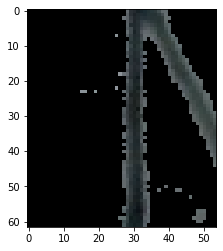

In [36]:
for x in range(0, largura):
    
    for y in range(0, altura):
        
        print(img[y, x])
cv2.imwrite("esse.jpg", img)
plt.imshow(img)
plt.show